In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#ANN Model 
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

In [3]:
#Splitting dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


In [4]:
X_train.shape
X_test.shape

(10000, 32, 32, 3)

In [5]:
X_train = X_train.reshape(50000,3072)
X_test = X_test.reshape(10000,3072)

In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [7]:
# Normalize to 0 to 1 range
X_train /= 255
X_test /= 255

In [8]:
batch_size = 128
num_classes = 10

In [9]:
# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

Label: [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


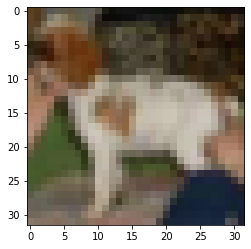

In [10]:
print("Label:",y_test[12:13])
plt.imshow(X_test[12:13].reshape(32,32,3), cmap='gray')
plt.show()

In [11]:
first_layer_size = 64
model = Sequential()
model.add(Dense(first_layer_size, activation='tanh', input_shape=(3072,)))
model.add(Dense(64, activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                196672    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4

2022-07-08 12:33:05.441803: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [13]:
epochs=100
history = model.fit(X_train,y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_test, y_test)
                    )

2022-07-08 12:33:06.350255: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
391/391 [==============================] - 5s 9ms/step - loss: 2.0581 - accuracy: 0.2457 - val_loss: 1.9025 - val_accuracy: 0.3062
Epoch 2/100
391/391 [==============================] - 3s 8ms/step - loss: 1.8795 - accuracy: 0.3222 - val_loss: 1.8245 - val_accuracy: 0.3492
Epoch 3/100
391/391 [==============================] - 3s 8ms/step - loss: 1.7989 - accuracy: 0.3538 - val_loss: 1.7405 - val_accuracy: 0.3864
Epoch 4/100
391/391 [==============================] - 3s 8ms/step - loss: 1.7525 - accuracy: 0.3727 - val_loss: 1.9309 - val_accuracy: 0.3248
Epoch 5/100
391/391 [==============================] - 4s 10ms/step - loss: 1.7174 - accuracy: 0.3891 - val_loss: 1.6728 - val_accuracy: 0.4083
Epoch 6/100
391/391 [==============================] - 3s 9ms/step - loss: 1.6867 - accuracy: 0.3985 - val_loss: 1.6854 - val_accuracy: 0.3972
Epoch 7/100
391/391 [==============================] - 3s 8ms/step - loss: 1.6645 - accuracy: 0.4076 - val_loss: 1.7394 - val_accuracy: 0.391

In [14]:
# Write the testing input and output variables
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.620760202407837
Test accuracy: 0.4643999934196472


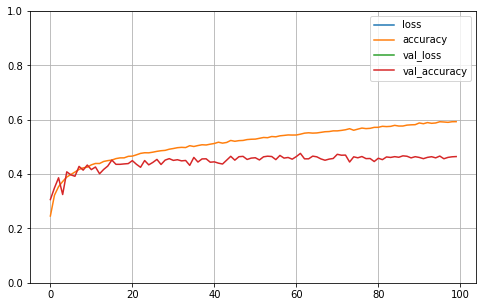

In [15]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()